## Load CSV from URL

### addendum for [Simple Graphing with IPython and Pandas](https://pbpython.com/simple-graphing-pandas.html)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline


Panda can read csv directly from url

In [13]:
url="https://pbpython.com/extras/sample-salesv2.csv"

In [ ]:
Import CSV

In [14]:
sales=pd.read_csv(url,parse_dates=['date'])
sales.head()

account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27

By using `.head` we can have an idea of the data, not all data is shown

In [15]:
customers = sales[['name','ext price','date']]
customers.head()

name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar     289.92 2014-03-01 10:51:24
3                  Waters-Walker     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    1793.52 2014-01-03 08:14:27

let's describe our data:

In [42]:
sales.describe()

account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.687597    25.331939   435.30381
min      93356.000000     1.000000    10.060000    10.38000
25%     299771.000000     5.750000    35.995000   232.60500
50%     563905.000000    10.000000    56.765000   471.72000
75%     750461.000000    15.000000    76.802500   878.13750
max     995267.000000    20.000000    99.970000  1994.80000

We can actually learn some pretty helpful info from this simple command:

* We can tell that customers on average purchases 10.3 items per transaction
* The average cost of the transaction was $579.84
* It is also easy to see the min and max so you understand the range of the data

If we want we can look at a single column as well:
    

In [43]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

## Plotting Some Data

We have our data read in and have completed some basic analysis. Let’s start plotting it.

First remove some columns to make additional analysis easier.


In [16]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

Now that our data is in a simple format to manipulate, let’s determine how much each customer purchased during our time frame.

The sum function allows us to quickly sum up all the values by customer. We can also sort the data using the sort command.

**WARNING** with Panda version >1.0, .sort() is depreciated

Replace:
```python
sales_totals.sort(columns='ext price').head()
```
by

```python
sales_totals.sort_values(by='ext price').head()
```


In [18]:
sales_totals = customer_group.sum()
sales_totals.sort_values(by='ext price').head()


ext price
name                                 
Davis, Kshlerin and Reilly   19054.76
Huel-Haag                    21087.88
Gorczany-Hahn                22207.90
Hamill-Hackett               23433.78
Heidenreich-Bosco            25428.29

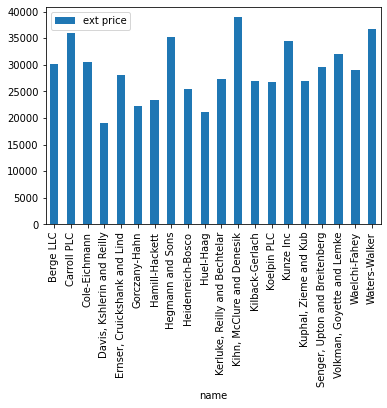

In [19]:
my_plot = sales_totals.plot(kind='bar')

* sorting the data in descending order
* removing the legend
* adding a title
* labeling the axes

In [20]:
customers = sales[['name','category','ext price','date']]
customers.head()


name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27

In [21]:
category_group=customers.groupby(['name','category']).sum()
category_group.head()

ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

In [22]:
category_group.unstack().head()


ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

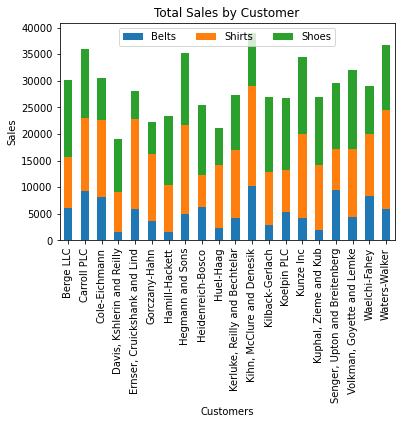

In [40]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"], loc=9,ncol=3)

Increase size

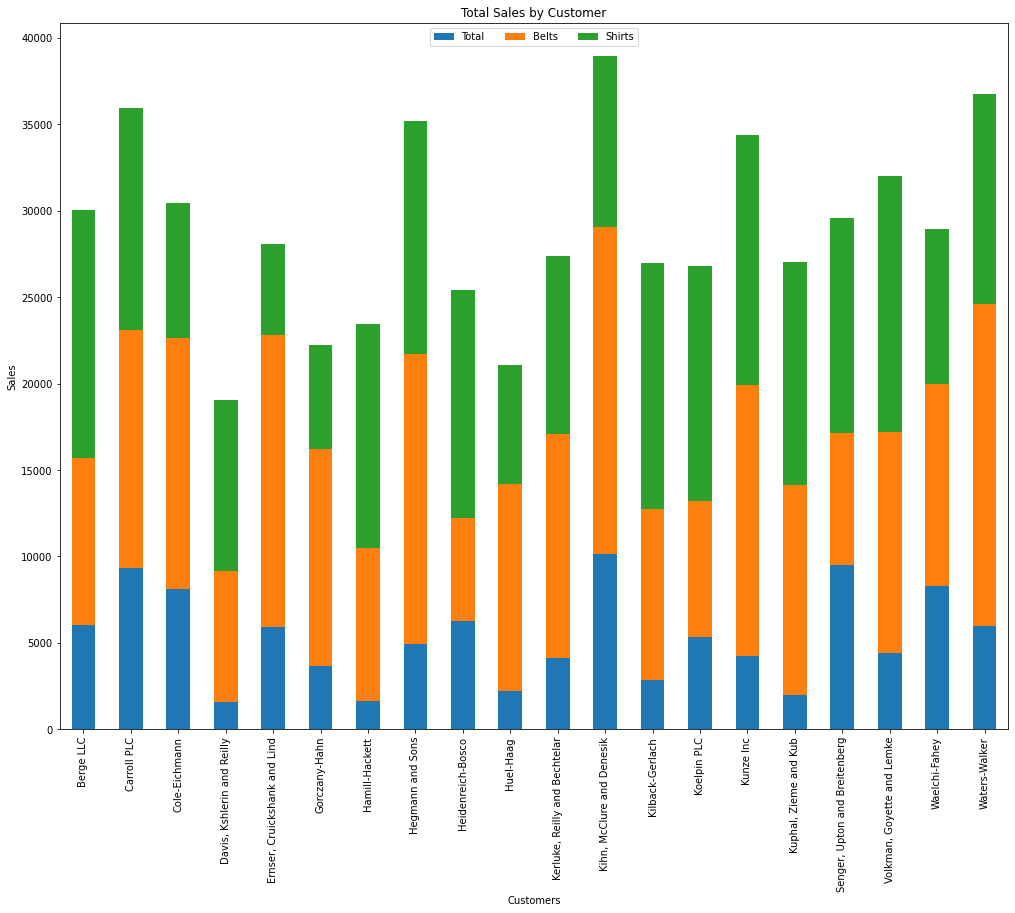

In [46]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(17, 13))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)


Now that we know who the biggest customers are and how they purchase products, we might want to look at purchase patterns in more detail.

Let’s take another look at the data and try to see how large the individual purchases are. A histogram allows us to group purchases together so we can see how big the customer transactions are.


In [48]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27

We can create a histogram with 20 bins to show the distribution of purchasing patterns.

Text(0, 0.5, 'Number of orders')

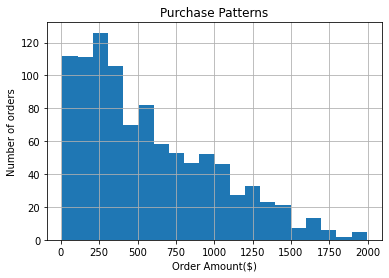

In [49]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

In looking at purchase patterns over time, we can see that most of our transactions are less than $500 and only a very few are about $1500.

Another interesting way to look at the data would be by sales over time. A chart might help us understand, “Do we have certain months where we are busier than others?”

Let’s get the data down to order size and date.

In [50]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27

if we want to analyze the data by date, we need to set the date column as the index using `set_index` .

In [52]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

ext price
date                          
2014-09-27 07:13:03     578.24
2014-07-29 02:10:44    1018.78
2014-03-01 10:51:24     289.92
2013-11-17 20:41:11     413.40
2014-01-03 08:14:27    1793.52

One of the really cool things that pandas allows us to do is resample the data. 

If we want to look at the data by month, we can easily resample and sum it all up. 

You’ll notice I’m using ‘M’ as the period for resampling which means the data should be resampled on a month boundary.



In [58]:
purchase_patterns.resample('M').sum()

ext price
date                 
2013-10-31   14085.27
2013-11-30   44932.78
2013-12-31   57752.23
2014-01-31   53161.35
2014-02-28   51783.56
2014-03-31   44991.85
2014-04-30   34098.05
2014-05-31   50001.02
2014-06-30   37477.65
2014-07-31   41686.71
2014-08-31   55497.09
2014-09-30   57107.51
2014-10-31   37268.83


<div class="alert alert-info"><h4>Note</h4>
<hr>
<p>

<strong>REPLACE</strong> 

```python
purchase_patterns.resample('M',how=sum)
```
<strong>By</strong> 
    
```python
purchase_patterns.resample('M').sum()
```
    
<br>
    
for newer panda versions see [pandas.DataFrame.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

    
</p></div>



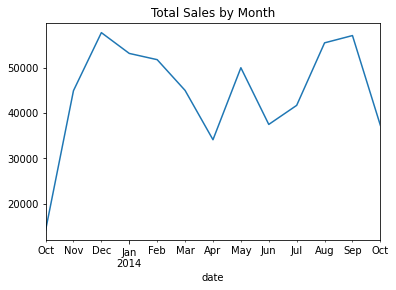

In [64]:
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month",legend=None)

now this it it, let's save it

In [65]:
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")
